In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv')

In [3]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [6]:
backup=df.copy()
# backup

In [7]:
df.shape

(892, 6)

In [8]:
df['year'].str.isnumeric().value_counts()

True     842
False     50
Name: year, dtype: int64

In [9]:
df=df[df['year'].str.isnumeric()]
df.shape

(842, 6)

In [10]:
# data cleaning
# year has string values and this is a object value
# company has integer value
# price is in object dtype and string value
# kms_driven is in kms but object
# fuel has nan values
# we keep first three words of name

In [11]:
df['year']=df['year'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2224\1756822702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype(int)


In [12]:
df=df[df.Price!='Ask For Price']

In [13]:
df.Price.value_counts()

2,50,000     16
3,50,000     12
4,00,000     11
1,80,000     11
1,30,000     11
             ..
7,49,999      1
11,30,000     1
10,74,999     1
3,24,999      1
5,00,001      1
Name: Price, Length: 272, dtype: int64

In [14]:
df.Price.unique

<bound method Series.unique of 0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object>

In [15]:
df['Price']=df.Price.str.replace(",", '')

In [16]:
df['Price']=df['Price'].astype(int)

In [17]:
new=df['kms_driven'].str.split(" ", n = 1, expand = True)

In [18]:
df['kms_driven']=new[0].str.replace(",",'')

In [19]:
df=df[df['kms_driven']!="Petrol"]

In [20]:
df['kms_driven']=df['kms_driven'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [22]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [23]:
df=df[~df['fuel_type'].isna()]

In [24]:
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [25]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

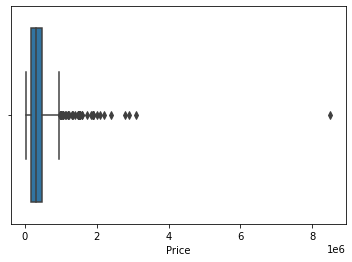

In [27]:
# outlier
sns.boxplot(df['Price'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

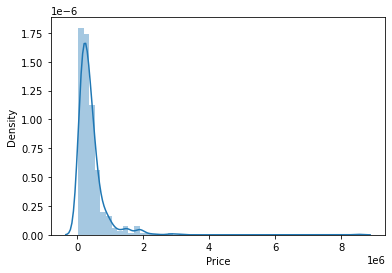

In [28]:
#skewness 
sns.distplot(df['Price'])

In [29]:
df=df[df['Price']<=6000000]


In [30]:
df.to_csv('clean_data.csv')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

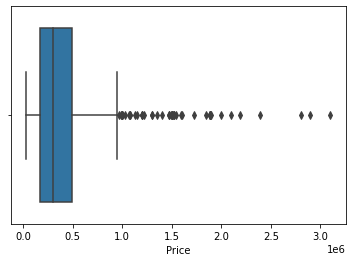

In [31]:
sns.boxplot(df['Price'])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Price'),df['Price'],test_size=0.1)

In [33]:
lr=LinearRegression()

In [44]:
ohe=OneHotEncoder()
ohe.fit(df.drop(columns='Price')[['name','company','fuel_type']])

OneHotEncoder()

In [45]:
tr1=ColumnTransformer([('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),['name','company','fuel_type'])],remainder='passthrough')
tr1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['name', 'company', 'fuel_type'])])

In [46]:
pipe=make_pipeline(tr1,lr)

In [51]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [54]:
y_pred=pipe.predict(x_test)
y_pred

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([ 5.86745423e+05,  4.71018030e+04,  4.34735174e+05, -1.13424692e+07,
        5.18295640e+05,  1.35207493e+05,  1.63707657e+05,  1.59498540e+05,
        1.31460549e+05,  5.98531243e+05,  4.98310835e+05,  1.96922703e+05,
       -5.37427751e+08,  5.18631804e+04,  1.61689258e+05,  1.58669987e+05,
        3.24088525e+05,  1.48951129e+05,  2.25791741e+05,  6.37907785e+05,
        1.75971016e+05,  2.33515023e+05, -4.81913897e+04,  3.81160265e+05,
        3.12027659e+06,  2.51859650e+05,  3.06476041e+05,  2.95276826e+05,
        2.11814799e+05,  1.41669413e+05,  4.43112188e+05,  4.91805338e+05,
       -4.64714118e+07,  6.56200036e+05,  3.11611685e+06,  1.01029423e+05,
        8.29999879e+05,  1.92551203e+05,  1.09618572e+05,  8.58098745e+05,
        4.20129366e+05,  4.11835011e+05,  8.61666830e+05,  2.70124166e+05,
        1.89113088e+06,  1.89113088e+06,  5.61257963e+05,  4.03947214e+05,
        9.69571565e+04,  8.29354716e+05,  3.14998826e+05,  2.51034134e+05,
        3.60388118e+05,  

In [55]:
r2_score(y_test,y_pred)

-20589.488467811247

In [50]:
y_test


651    540000
829     60000
12     415000
66     315000
376    379000
        ...  
342    375000
856    100000
470    230000
196    355000
321    799999
Name: Price, Length: 82, dtype: int32

In [40]:
y_pred

array([ 5.86745423e+05,  4.71018030e+04,  4.34735174e+05, -1.13424692e+07,
        5.18295640e+05,  1.35207493e+05,  1.63707657e+05,  1.59498540e+05,
        1.31460549e+05,  5.98531243e+05,  4.98310835e+05,  1.96922703e+05,
       -5.37427751e+08,  5.18631804e+04,  1.61689258e+05,  1.58669987e+05,
        3.24088525e+05,  1.48951129e+05,  2.25791741e+05,  6.37907785e+05,
        1.75971016e+05,  2.33515023e+05, -4.81913897e+04,  3.81160265e+05,
        3.12027659e+06,  2.51859650e+05,  3.06476041e+05,  2.95276826e+05,
        2.11814799e+05,  1.41669413e+05,  4.43112188e+05,  4.91805338e+05,
       -4.64714118e+07,  6.56200036e+05,  3.11611685e+06,  1.01029423e+05,
        8.29999879e+05,  1.92551203e+05,  1.09618572e+05,  8.58098745e+05,
        4.20129366e+05,  4.11835011e+05,  8.61666830e+05,  2.70124166e+05,
        1.89113088e+06,  1.89113088e+06,  5.61257963e+05,  4.03947214e+05,
        9.69571565e+04,  8.29354716e+05,  3.14998826e+05,  2.51034134e+05,
        3.60388118e+05,  

In [41]:
# sns.scatterplot(x_test.index,y_test)